<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [ ]:
!pip install pandas

In [1]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-04-19 11:39:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  76.8MB/s    in 2.0s    

2025-04-19 11:39:51 (76.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



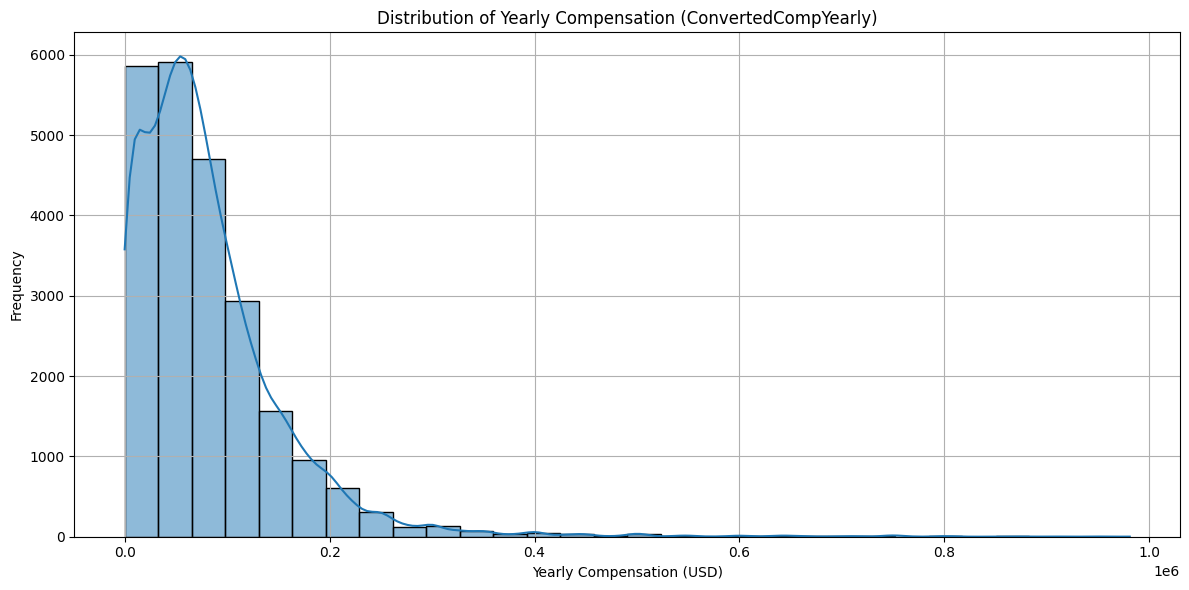

In [18]:
!pip install seaborn
import seaborn as sns # Load the dataset
df = pd.read_csv('survey-data.csv')

# Drop rows with missing values in the ConvertedCompYearly column
df_clean = df.dropna(subset=['ConvertedCompYearly'])
df_clean = df_clean[df_clean['ConvertedCompYearly'] < 1e6]

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['ConvertedCompYearly'], bins=30, kde=True)
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



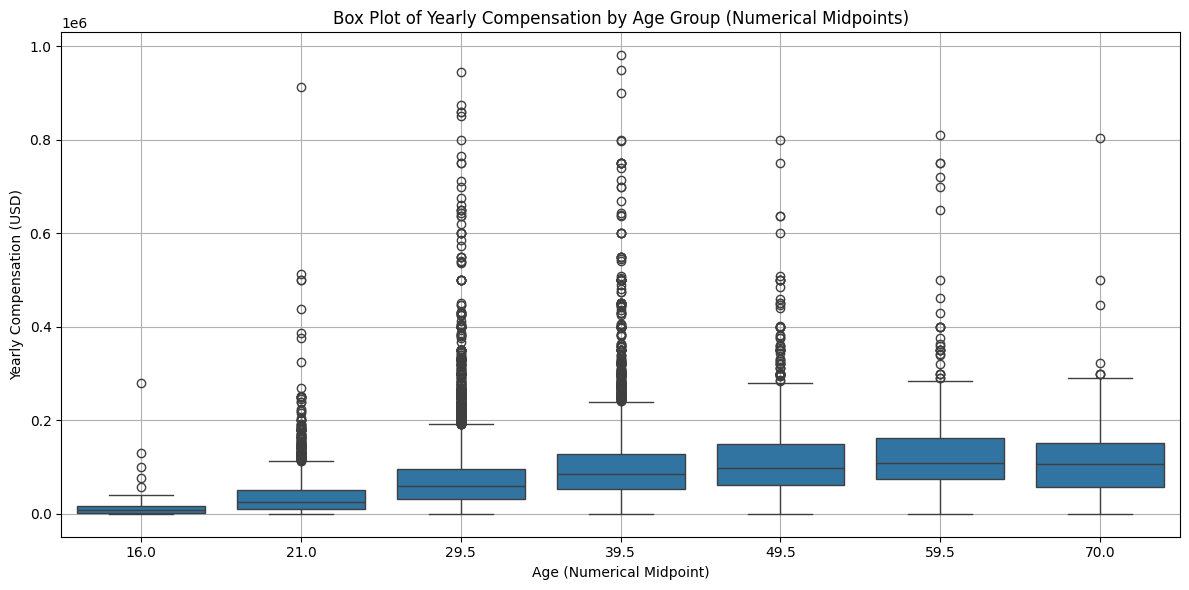

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('survey-data.csv')

# Define a mapping from age categories to numerical midpoints
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Map the age categories to numerical values
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Drop rows with missing values in 'AgeNumeric' and 'ConvertedCompYearly'
df_clean = df.dropna(subset=['AgeNumeric', 'ConvertedCompYearly'])
df_clean = df.dropna(subset=['ConvertedCompYearly'])
df_clean = df_clean[df_clean['ConvertedCompYearly'] < 1e6]


# Plot the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='AgeNumeric', y='ConvertedCompYearly', data=df_clean)
plt.title('Box Plot of Yearly Compensation by Age Group (Numerical Midpoints)')
plt.xlabel('Age (Numerical Midpoint)')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



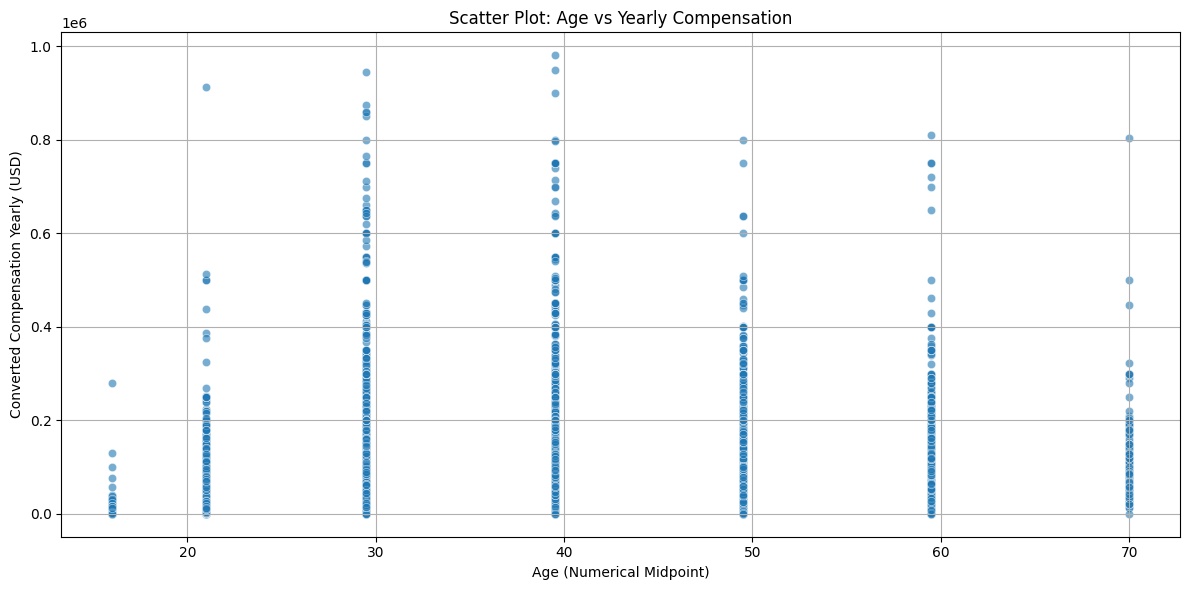

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('survey-data.csv')

# Age mapping
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Convert Age to numeric
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop missing values
df_clean = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])

df_clean = df.dropna(subset=['ConvertedCompYearly'])
df_clean = df_clean[df_clean['ConvertedCompYearly'] < 1e6]

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x='Age_numeric', y='ConvertedCompYearly', alpha=0.6)
plt.title('Scatter Plot: Age vs Yearly Compensation')
plt.xlabel('Age (Numerical Midpoint)')
plt.ylabel('Converted Compensation Yearly (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


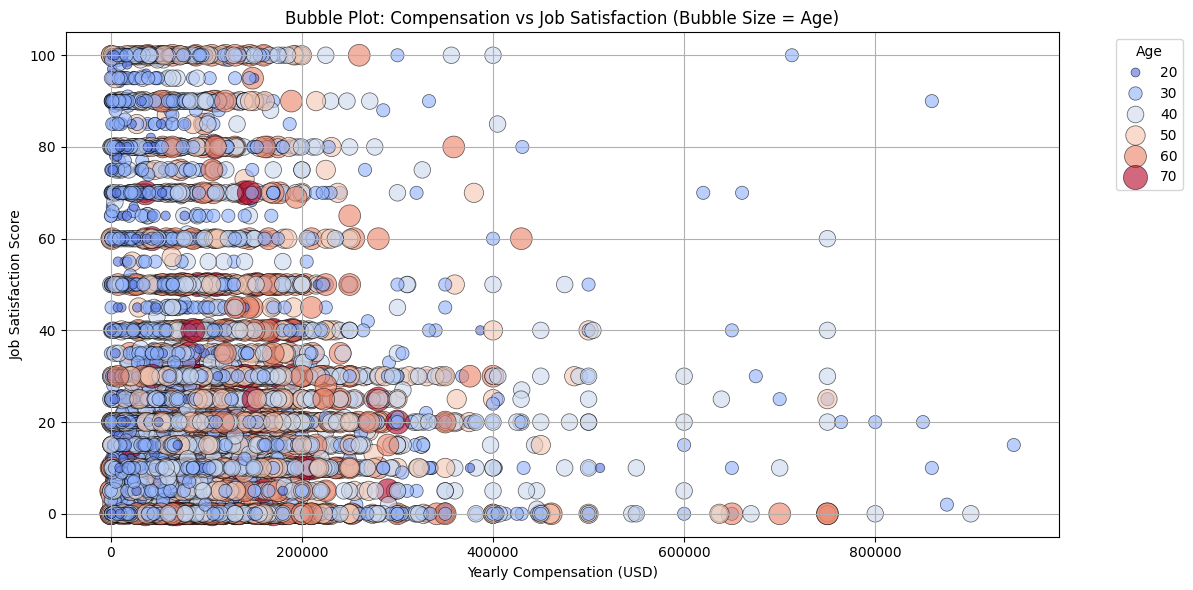

In [19]:
# Load data
df = pd.read_csv('survey-data.csv')

# Map age ranges to numeric values
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop missing values from required columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_numeric'])

# Filter out compensation outliers (keep values under 1 million for clean view)
df_clean = df_clean[df_clean['ConvertedCompYearly'] < 1e6]

# Create the bubble plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_clean,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    size='Age_numeric',
    sizes=(20, 300),
    hue='Age_numeric',
    palette='coolwarm',
    alpha=0.6,
    edgecolor='black'
)

plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



/tmp/ipykernel_6713/1241062198.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_distribution.values, y=role_distribution.index, palette='viridis')


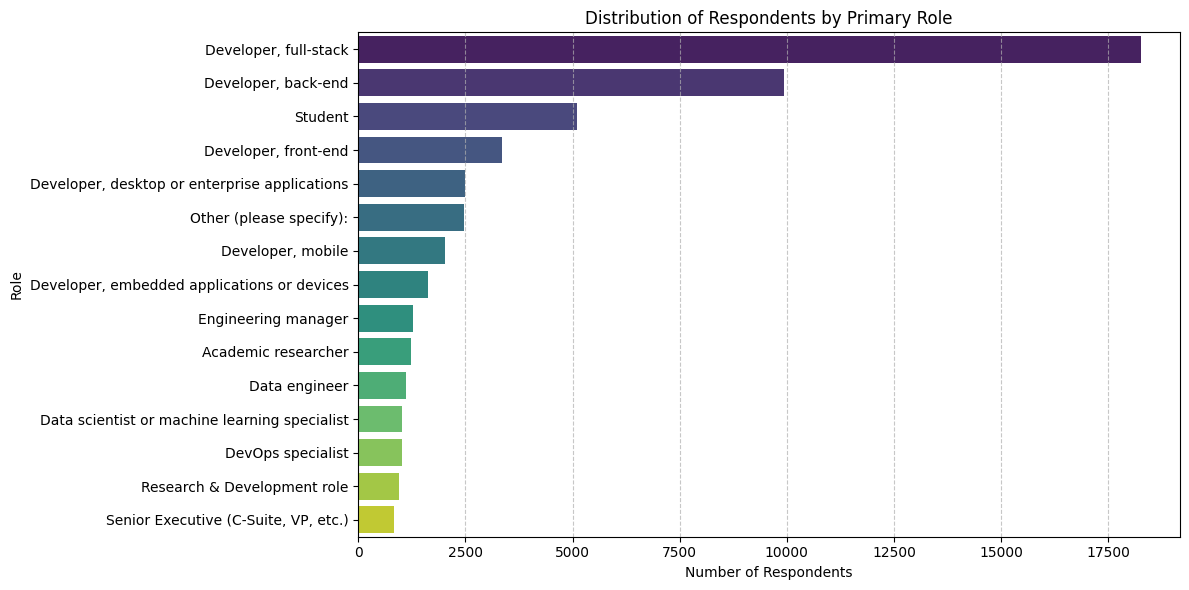

In [20]:
# Load the dataset
df = pd.read_csv('survey-data.csv')

# Replace 'YourRoleColumn' with the actual column name for role
role_column = 'DevType'  # ← Change this if your column is named differently

# Drop NaN values
role_counts = df[role_column].dropna()

# If multiple roles are comma-separated, split them
all_roles = role_counts.str.split(';').explode().str.strip()

# Count frequency
role_distribution = all_roles.value_counts().head(15)  # show top 15 roles

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=role_distribution.values, y=role_distribution.index, palette='viridis')
plt.title('Distribution of Respondents by Primary Role')
plt.xlabel('Number of Respondents')
plt.ylabel('Role')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



/tmp/ipykernel_6713/1838640157.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.values, y=language_counts.index, palette='magma')


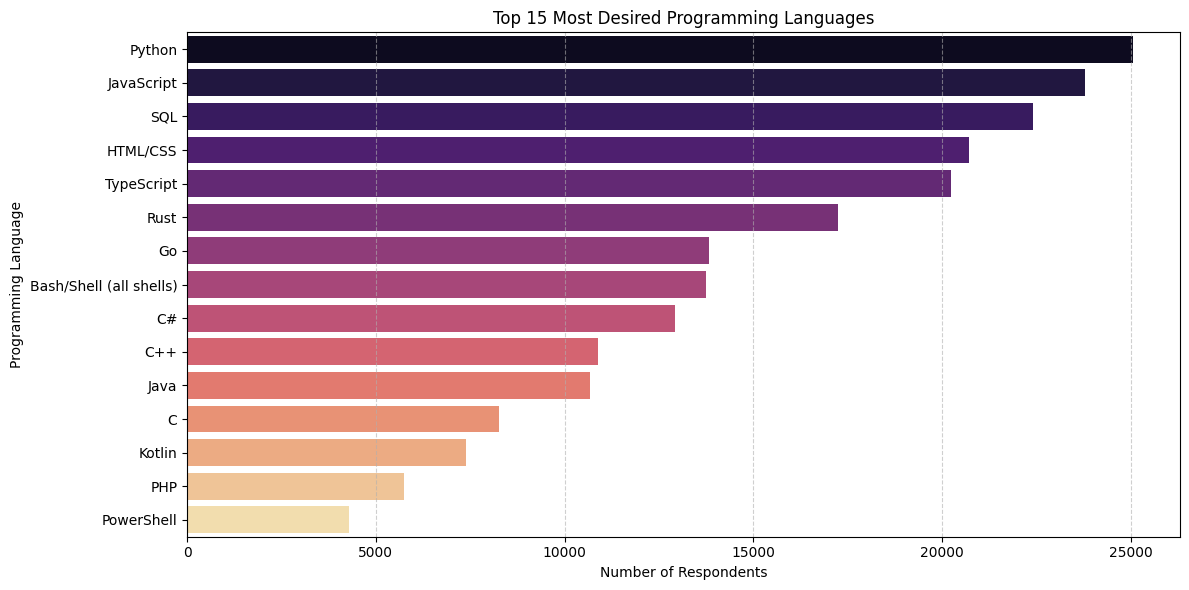

In [21]:
# Load dataset
df = pd.read_csv('survey-data.csv')

# Replace 'LanguageWantToWorkWith' with your exact column name if different
language_col = 'LanguageWantToWorkWith'

# Drop missing values
languages = df[language_col].dropna()

# Split multiple selections and flatten the list
language_list = languages.str.split(';').explode().str.strip()

# Count occurrences
language_counts = language_list.value_counts().head(15)  # Top 15

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.values, y=language_counts.index, palette='magma')
plt.title('Top 15 Most Desired Programming Languages')
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


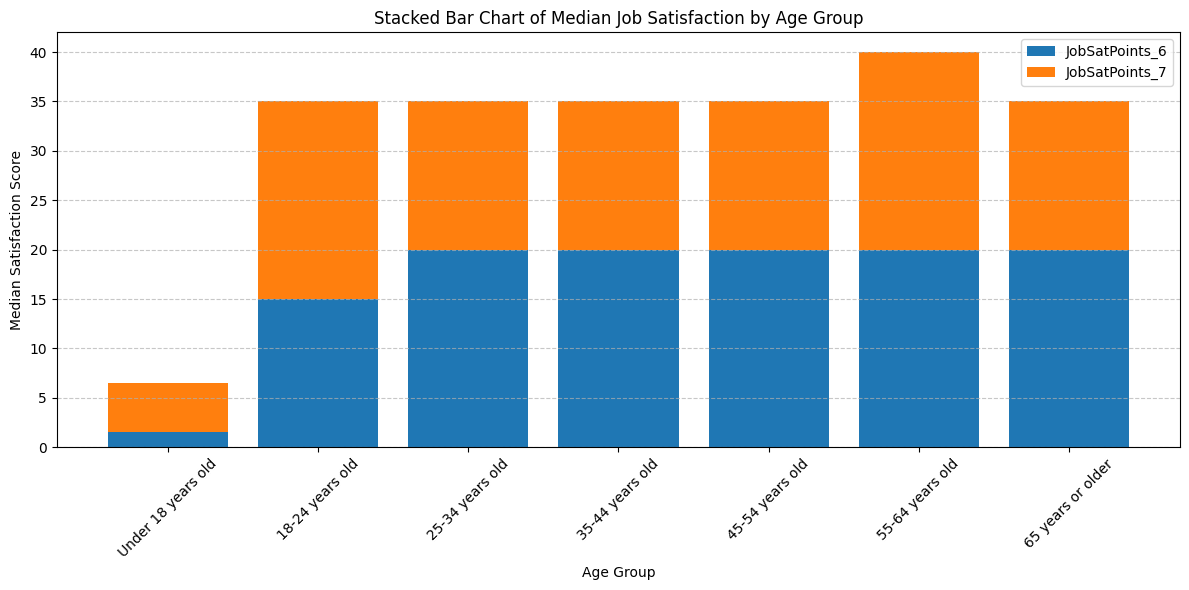

In [22]:

# Load the dataset
df = pd.read_csv('survey-data.csv')

# Replace with your actual column names if different
age_col = 'Age'
sat_6 = 'JobSatPoints_6'
sat_7 = 'JobSatPoints_7'

# Filter and group by Age group
df_grouped = df[[age_col, sat_6, sat_7]].dropna()

# Convert job satisfaction to numeric if it's not already
df_grouped[sat_6] = pd.to_numeric(df_grouped[sat_6], errors='coerce')
df_grouped[sat_7] = pd.to_numeric(df_grouped[sat_7], errors='coerce')

# Group by Age and calculate median
median_satisfaction = df_grouped.groupby(age_col).median().loc[
    ['Under 18 years old', '18-24 years old', '25-34 years old',
     '35-44 years old', '45-54 years old', '55-64 years old',
     '65 years or older']  # Ordered for logical age progression
]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(median_satisfaction.index, median_satisfaction[sat_6], label='JobSatPoints_6')
plt.bar(median_satisfaction.index, median_satisfaction[sat_7], 
        bottom=median_satisfaction[sat_6], label='JobSatPoints_7')

plt.title('Stacked Bar Chart of Median Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



/tmp/ipykernel_6713/570252291.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=db_counts.values, y=db_counts.index, palette='coolwarm')


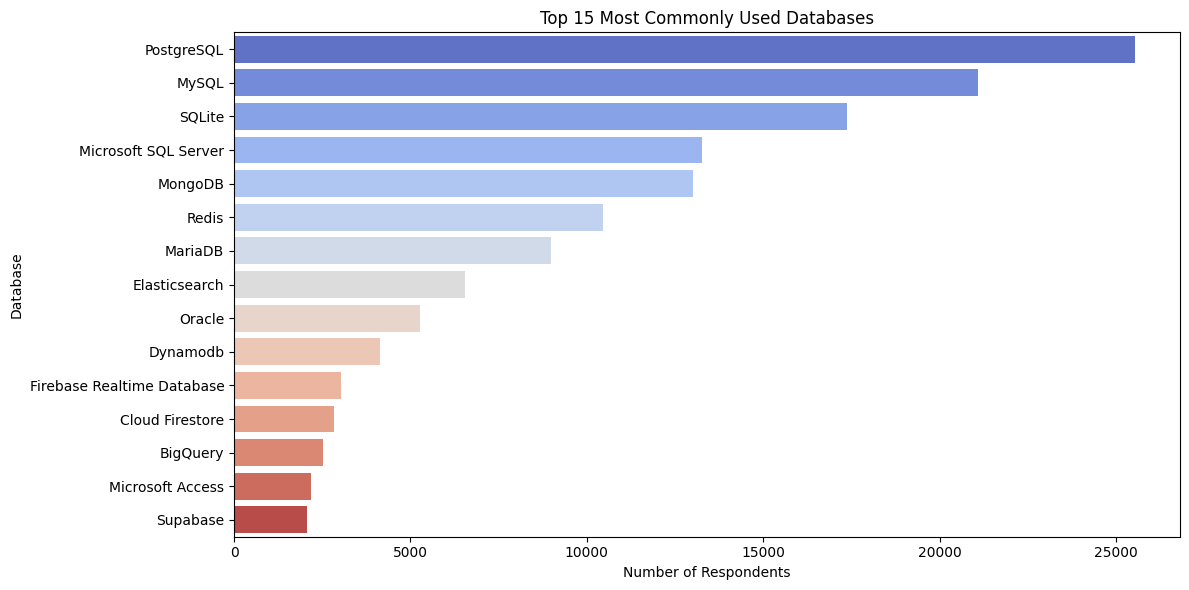

In [23]:
df = pd.read_csv('survey-data.csv')

db_col = 'DatabaseHaveWorkedWith'

db_series = df[db_col].dropna()
db_exploded = db_series.str.split(';').explode().str.strip()
db_counts = db_exploded.value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=db_counts.values, y=db_counts.index, palette='coolwarm')
plt.title('Top 15 Most Commonly Used Databases')
plt.xlabel('Number of Respondents')
plt.ylabel('Database')
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_6713/3446267834.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_compensation.index, y=median_compensation.values, palette='Blues_d')


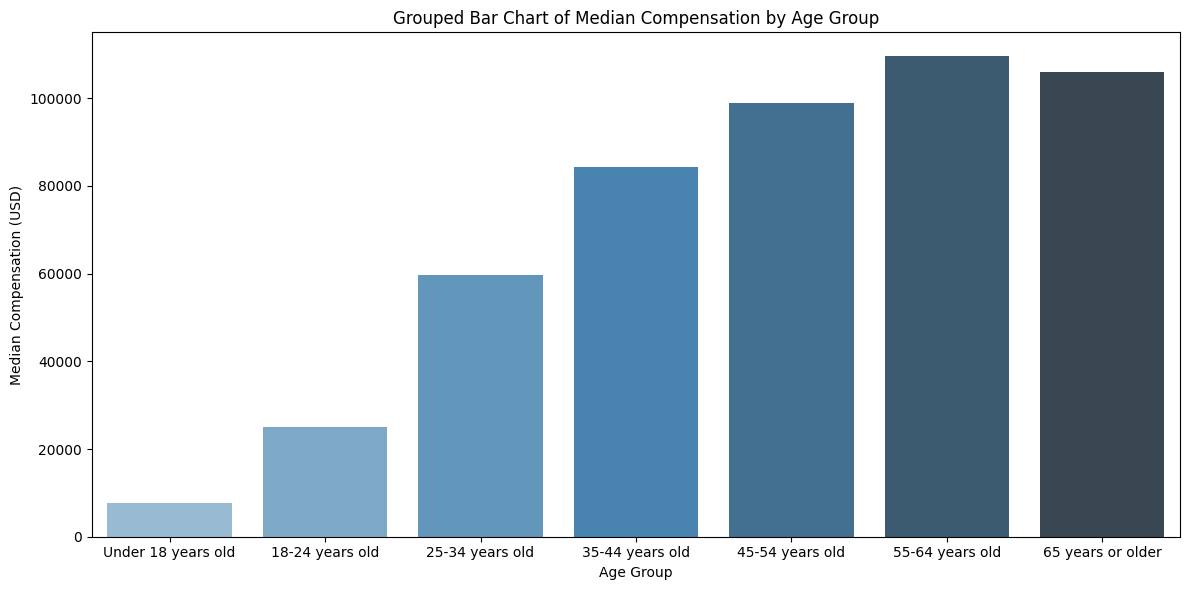

In [27]:
df = pd.read_csv('survey-data.csv')

age_col = 'Age'
comp_col = 'ConvertedCompYearly'

df_grouped = df[[age_col, comp_col]].dropna()
df_grouped[comp_col] = pd.to_numeric(df_grouped[comp_col], errors='coerce')
df_grouped = df_grouped[df_grouped[comp_col] < 1e6]

median_compensation = df_grouped.groupby(age_col).median()[comp_col].loc[
    ['Under 18 years old', '18-24 years old', '25-34 years old',
     '35-44 years old', '45-54 years old', '55-64 years old',
     '65 years or older']
]

plt.figure(figsize=(12, 6))
sns.barplot(x=median_compensation.index, y=median_compensation.values, palette='Blues_d')
plt.title('Grouped Bar Chart of Median Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.tight_layout()
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



/tmp/ipykernel_6713/3568202939.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


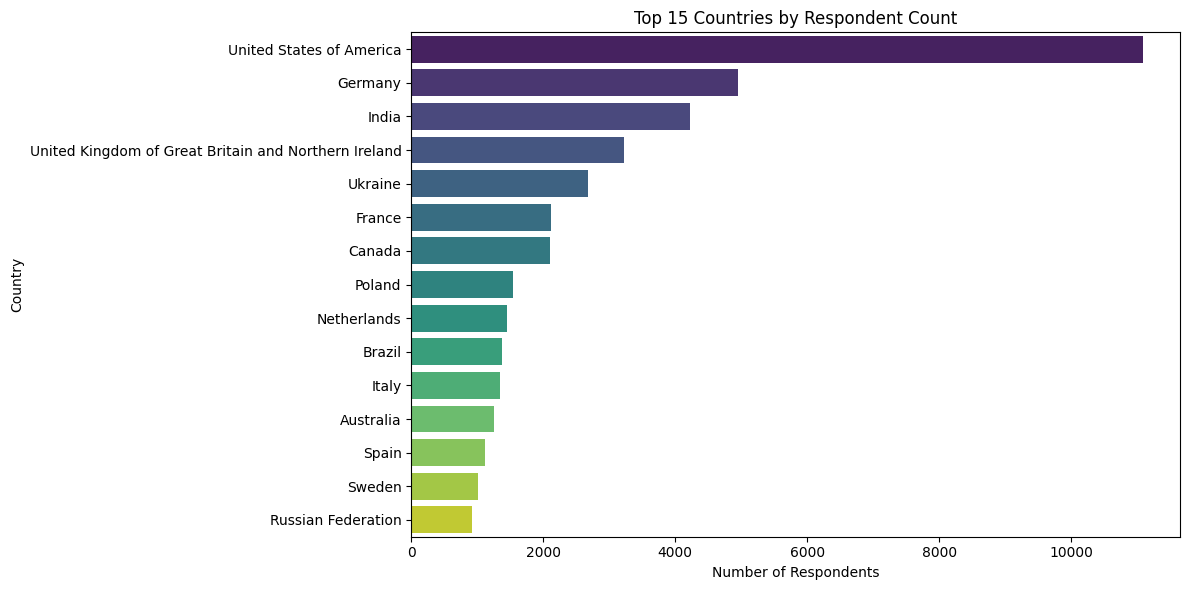

In [28]:
df = pd.read_csv('survey-data.csv')

country_col = 'Country'

country_counts = df[country_col].dropna().value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 15 Countries by Respondent Count')
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
